In [1]:
import os
%pwd

'/mnt/cb03386d-9344-47b1-82f9-868fbb64b4ae/python_projects/Cell_Segmentation_YOLO-v8/research'

In [2]:
os.chdir('../')
%pwd

'/mnt/cb03386d-9344-47b1-82f9-868fbb64b4ae/python_projects/Cell_Segmentation_YOLO-v8'

In [ ]:
from ultralytics import YOLO

yolo = '/mnt/cb03386d-9344-47b1-82f9-868fbb64b4ae/python_projects/Cell_Segmentation_YOLO-v8/artifacts/model_trainer/yolov8n-seg/results/200_epochs_/weights/best.pt'
img = '/mnt/cb03386d-9344-47b1-82f9-868fbb64b4ae/python_projects/Cell_Segmentation_YOLO-v8/artifacts/data_transformation/train/0acd2c223d300ea55d0546797713851e818e5c697d073b7f4091b96ce0f3d2fe_0.png'

model = YOLO(yolo)

res = model.predict(img, conf=0.1)

In [ ]:
model.args

In [ ]:
import kaggle
from dotenv import load_dotenv
import os
import subprocess
import cv2

load_dotenv()

In [ ]:
competition_name = "data-science-bowl-2018"
dataset_filename = "stage1_train.zip"
root_dir = "/mnt/cb03386d-9344-47b1-82f9-868fbb64b4ae/python_projects/Cell_Segmentation_YOLO-v8/data"

In [ ]:
!kaggle competitions download -c $competition_name -f $dataset_filename -p $root_dir

In [ ]:
os.system("kaggle competitions download -c data-science-bowl-2018 -f stage1_train.zip -p '/mnt/cb03386d-9344-47b1-82f9-868fbb64b4ae/python_projects/Cell_Segmentation_YOLO-v8/data'")

In [ ]:
info = os.system(f"kaggle competitions download -c {competition_name} -f {dataset_filename} -p {root_dir}")

In [ ]:
info = subprocess.run(f"kaggle competitions download -c {competition_name} -f {dataset_filename} -p {root_dir}", shell=True)

In [ ]:
print(info)

In [ ]:
os.chdir('../')
%pwd

In [ ]:
path_folder = 'artifacts/data_ingestion/train'

In [ ]:
folder_list = os.listdir(path_folder)

In [ ]:
for dir in folder_list:
    img_pth = os.path.join(
        path_folder,
        dir,
        'images',
        dir + '.png'
    )
    
    img_ann = ''
    for ann in os.listdir(os.path.join(path_folder, dir, 'masks')):
        cell_line = '0'
        ann_img = cv2.imread(os.path.join(path_folder, dir, 'masks', ann), 0)
        contours, hierarchy = cv2.findContours(ann_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        for dot in contours[0]:
            cell_line += ' ' + str(dot[0][1] / 255) + ' ' + str(dot[0][0] / 255)
        cell_line += '\n'
    
        img_ann += cell_line
    
    break

In [ ]:
train_list = os.listdir('artifacts/data_transformation/validation')

In [ ]:
len(train_list)

In [ ]:
train_list = [s for s in train_list if '.png' in s]

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train_list, test_size=0.2, random_state=42,shuffle=True)

In [ ]:
len(val)

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [13]:
model = YOLO('artifacts/model_trainer/yolov8n-seg/results/200_epochs_4/weights/best.pt').to('cuda')

In [51]:
image = 'artifacts/data_transformation/validation/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_4.png'
results = model.predict(source=image)


image 1/1 /mnt/cb03386d-9344-47b1-82f9-868fbb64b4ae/python_projects/Cell_Segmentation_YOLO-v8/artifacts/data_transformation/validation/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_4.png: 256x256 36 Cells, 11.5ms
Speed: 0.6ms preprocess, 11.5ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 256)


In [52]:
R = 0
G = 204/255
B = 255/255

mask = np.zeros((256, 256), dtype=np.uint8)
img = cv2.imread(image)
# img.resize(1024, 1024, 3)

for i, m in enumerate(results[0].masks.data):
    m = np.uint8(m.cpu().numpy()) * 255
    # m = cv2.GaussianBlur(m, (7,7), sigmaX=2)
    # m = cv2.bilateralFilter(m, d=9, sigmaColor=75, sigmaSpace=75)
    mask += m

mask = np.float32(mask)
mask = np.uint8(cv2.merge((R*mask, G*mask, B*mask)))
if not img.shape[2]:
    img = np.uint8(cv2.merge((img, img, img)))

img_w_m = cv2.addWeighted(img, 1.0, mask, 0.4, 0)

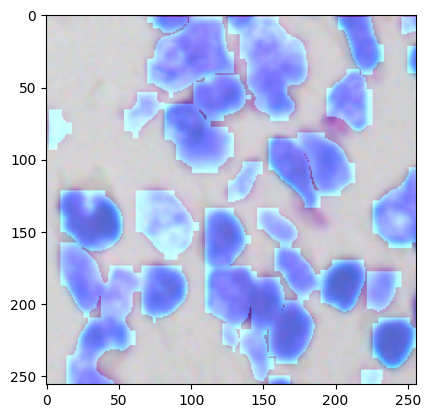

In [53]:
plt.imshow(img_w_m)
# mask[0].shape

In [15]:
test_sample = results[0].plot(show_masks=True, show_boxes=False)
plt.matshow(test_sample)

TypeError: Results.plot() got an unexpected keyword argument 'show_masks'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [68]:
triangle = np.zeros((200, 300), dtype=np.uint8)
cv2.fillPoly(triangle, [np.array([[50,50], [50,100], [100, 75]], dtype=np.int32)], 255)
contours, _ = cv2.findContours(
                    triangle,
                    cv2.RETR_LIST,
                    cv2.CHAIN_APPROX_SIMPLE
                )

In [ ]:
crd = [[dot[0][1]/triangle.shape[0], dot[0][0]/triangle.shape[1]] for dot in contours[0]]
crd = np.int32([[dot[1]*triangle.shape[1], dot[0]*triangle.shape[0]] for dot in crd])
crd

In [99]:
tri = np.zeros_like(triangle, dtype=np.uint8)

cv2.fillPoly(tri, [crd], 255)
# tri = cv2.flip(tri, 0)
# tri = cv2.rotate(tri, cv2.ROTATE_90_COUNTERCLOCKWISE)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
img = cv2.imread(
    os.path.join(
        img_path,
        'images',
        img_name
    ),
    0
)

mask_cmb = np.zeros((256, 256))

for mask in os.listdir(os.path.join(img_path, 'masks')):
    mask_img = cv2.imread(os.path.join(
        img_path,
        'masks',
        mask
    ), 0)
    
    mask_cmb += mask_img

mask_cmb = np.float32(mask_cmb)

In [62]:
R = 0
G = 204/255
B = 255/255

In [ ]:
img_mask = np.uint8(cv2.merge((R*mask_cmb, G*mask_cmb, B*mask_cmb)))
img = np.uint8(cv2.merge((img, img, img)))

img_w_m = cv2.addWeighted(img, 1.0, img_mask, 0.4, 0)

In [66]:
triangle.shape

(200, 300)

In [11]:
path = 'artifacts/data_transformation/train'
name = '00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e_4'
image_name = name + '.png'
label_name = name + '.txt'

In [12]:
with open(os.path.join(path, label_name), 'r') as f:
    txt = f.readlines()

# with open('artifacts/data_transformation/train/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_0.txt', 'r') as f:
#     txt = f.readlines()

img = cv2.cvtColor(cv2.imread(os.path.join(path, image_name)), cv2.COLOR_BGR2RGB)

mask = np.zeros_like(img[:,:,0], dtype=np.uint8)

for shape_str in txt:
    cords_str = str.split(shape_str)[1:]
    
    cords = []
    for j in range(0, len(cords_str), 2):
        cords.append(
            [
                np.uint8(mask.shape[1]*np.float32(cords_str[j])),
                np.uint8(mask.shape[0]*np.float32(cords_str[j+1]))
            ]
        )

    cords = np.array(cords, dtype=np.int32)

    cv2.fillConvexPoly(mask, cords, 255)
    
mask = np.float32(mask)

mask = np.uint8(cv2.merge((R*mask, G*mask, B*mask)))
if not img.shape[2]:
    img = np.uint8(cv2.merge((img, img, img)))

img_w_m = cv2.addWeighted(img, 1.0, mask, 0.4, 0)

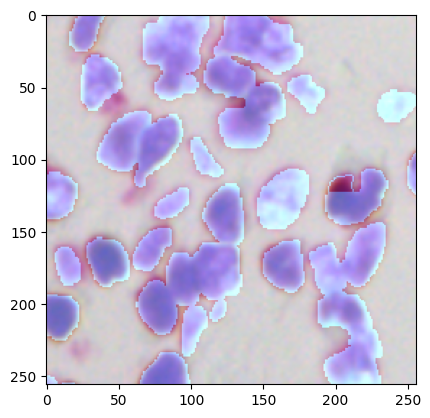

In [13]:
plt.imshow(img_w_m)

In [ ]:
cords = []
for j in range(0, len(cords_str), 2):
    cords.append([np.uint8(255*np.float32(cords_str[j])), np.uint8(255*np.float32(cords_str[j+1]))])

cords = np.array(cords, dtype=np.int32)

In [48]:
img.shape[0]

256

In [ ]:
cv2.fillPoly(mask, [cords], 255)

In [ ]:
mask.shape

In [9]:
image = cv2.imread('artifacts/data_transformation/train/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9_0.png', 0)

In [12]:
image.shape

(256, 256)

In [41]:
import shutil

color_list = os.listdir('artifacts/data_transformation/colored')

for image in os.listdir('artifacts/data_transformation/train'):
    if image not in color_list:
        shutil.copy2(
            os.path.join('artifacts/data_transformation/train', image),
            os.path.join('artifacts/data_transformation/grayscale', image)
        )

In [60]:
gs = cv2.imread('artifacts/data_transformation/colored/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e.png')

In [104]:
path = 'artifacts/data_transformation/train'
k = 0

for imgn in os.listdir(path):
    if str.split(imgn, '.')[-1] != 'txt':
        img = cv2.imread(os.path.join(path, imgn))
        # print(os.path.join(path, imgn))
        if (np.array_equal(img[:,:,0], img[:,:,1]) and np.array_equal(img[:,:,1], img[:,:,2])):
            k += 1

print(k)

892


In [96]:
import random

def balance_data(path, aug_size):
    color_list = []
    grayscale_list = []
    
    for folder in os.listdir(path):
        img = cv2.imread(os.path.join(
            path,
            folder,
            'images',
            folder + '.png'
        ))
        
        if np.array_equal(img[:,:,0], img[:,:,1]) and np.array_equal(img[:,:,1], img[:,:,2]):
            grayscale_list.append(folder + '.png')
        else:
            color_list.append(folder + '.png')
    
    # imbalance_ratio = round(max(len(grayscale_list), len(color_list)) / min(len(grayscale_list), len(color_list)))
    
    if len(grayscale_list) >= len(color_list):
        gray_aug_count = aug_size * len(grayscale_list) - len(grayscale_list)
        color_aug_count = aug_size * len(grayscale_list) - len(color_list)
    else:
        gray_aug_count = aug_size * len(color_list) - len(grayscale_list)
        color_aug_count = aug_size * len(color_list) - len(color_list)
        
    grayscale_list.extend(random.choices(grayscale_list, k=gray_aug_count))
    color_list.extend(random.choices(color_list, k=color_aug_count))
    
    return grayscale_list, color_list

In [100]:
grayscale_list, color_list = balance_data('artifacts/data_ingestion/train', 1)

print(len(grayscale_list), len(color_list))

562 562


In [86]:
for image in grayscale_list:
    i = 0
    
    while image + '_' + str(i) in os.listdir(path):
        i += 1
    
    img_folder_path = os.path.join(path, image)
    

2